In [4]:
import re
import pandas as pd


In [5]:
f=open('WhatsApp Chat with Priyanshu.txt','r',encoding='utf-8')
data=f.read()
print(data)

29/12/2024, 17:29 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
29/12/2024, 17:29 - Priyanshu: Nikal gye?
29/12/2024, 17:29 - Priyanshu: Campus ke liye?
29/12/2024, 18:37 - ~monty: Mai Patna aa gya hu
29/12/2024, 18:40 - Priyanshu: Mtlb?
29/12/2024, 20:56 - Priyanshu: Bhai ye Madhav ki shi mai shaadi hogyi kya?
30/12/2024, 02:51 - ~monty: Nhi nhi
30/12/2024, 02:51 - ~monty: Bakchodi kr rhe
30/12/2024, 02:52 - ~monty: Nani ICU me thi
30/12/2024, 02:52 - ~monty: To dekhne gya tha mai hospital
30/12/2024, 02:52 - ~monty: Fir inko join kr liya
31/12/2024, 18:14 - Priyanshu: Kya kr rhe bhai?
31/12/2024, 18:15 - ~monty: Room me leta hu
31/12/2024, 18:15 - Priyanshu: Badhiya
31/12/2024, 18:15 - Priyanshu: Party chalu hui
31/12/2024, 18:15 - Priyanshu: 😂
31/12/2024, 18:15 - ~monty: Nahi rat me krenge sayad
31/12/2024, 18:15 - Priyanshu: Achala
31/12/2024, 18:15 - Priyanshu: Bhai Mai keh rha tha ki
31/12/2024, 18:15 - ~mo

In [6]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages=re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 'Priyanshu: Nikal gye?\n',
 'Priyanshu: Campus ke liye?\n',
 '~monty: Mai Patna aa gya hu\n',
 'Priyanshu: Mtlb?\n',
 'Priyanshu: Bhai ye Madhav ki shi mai shaadi hogyi kya?\n',
 '~monty: Nhi nhi\n',
 '~monty: Bakchodi kr rhe\n',
 '~monty: Nani ICU me thi\n',
 '~monty: To dekhne gya tha mai hospital\n',
 '~monty: Fir inko join kr liya\n',
 'Priyanshu: Kya kr rhe bhai?\n',
 '~monty: Room me leta hu\n',
 'Priyanshu: Badhiya\n',
 'Priyanshu: Party chalu hui\n',
 'Priyanshu: 😂\n',
 '~monty: Nahi rat me krenge sayad\n',
 'Priyanshu: Achala\n',
 'Priyanshu: Bhai Mai keh rha tha ki\n',
 '~monty: Ki?\n',
 'Priyanshu: Agar tere paas paise ho to bhejde yaar\n',
 'Priyanshu: Acc khali hogya hai\n',
 'Priyanshu: Ab papa aane waale din denge\n',
 'Priyanshu: Maang bhi nhi skta abhi\n',
 '~monty: 2-3 din me dunga to nhi chlega kya ...gharwalo se mang nhi skta abhi ..Nani ka de

In [8]:
dates=re.findall(pattern,data)
df=pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2024-12-29 17:29:00
1,Priyanshu: Nikal gye?\n,2024-12-29 17:29:00
2,Priyanshu: Campus ke liye?\n,2024-12-29 17:29:00
3,~monty: Mai Patna aa gya hu\n,2024-12-29 18:37:00
4,Priyanshu: Mtlb?\n,2024-12-29 18:40:00


In [9]:
users = []
messages = []

pattern = r'(^[^:]+):\s'  

for message in df['user_message']:
    entry = re.split(pattern, message)

    if len(entry) > 2:  
        users.append(entry[1])
        messages.append(entry[2])
    else:            
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head(20)


,date,user,message
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n
5,2024-12-29 20:56:00,Priyanshu,Bhai ye Madhav ki shi mai shaadi hogyi kya?\n
6,2024-12-30 02:51:00,~monty,Nhi nhi\n
7,2024-12-30 02:51:00,~monty,Bakchodi kr rhe\n
8,2024-12-30 02:52:00,~monty,Nani ICU me thi\n
9,2024-12-30 02:52:00,~monty,To dekhne gya tha mai hospital\n


In [10]:
df['year']=df['date'].dt.year
df.head()

,date,user,message,year
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024


In [11]:
df['month']=df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,December
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December


In [12]:
df['day']=df['date'].dt.day
df

,date,user,message,year,month,day
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,December,29
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29
...,...,...,...,...,...,...
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17
12486,2025-11-17 22:45:00,Priyanshu,<Media omitted>\n,2025,November,17


In [13]:
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df

,date,user,message,year,month,day,hour,minute
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,December,29,17,29
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29,17,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29,17,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29,18,37
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29,18,40
...,...,...,...,...,...,...,...,...
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17,22,45
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17,22,45
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17,22,45
12486,2025-11-17 22:45:00,Priyanshu,<Media omitted>\n,2025,November,17,22,45


In [14]:
df[df['user']=='Priyanshu'].shape

(6915, 8)

In [15]:
words=[]
for message in df['message']:
    words.extend(message.split())
words


['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Nikal',
 'gye?',
 'Campus',
 'ke',
 'liye?',
 'Mai',
 'Patna',
 'aa',
 'gya',
 'hu',
 'Mtlb?',
 'Bhai',
 'ye',
 'Madhav',
 'ki',
 'shi',
 'mai',
 'shaadi',
 'hogyi',
 'kya?',
 'Nhi',
 'nhi',
 'Bakchodi',
 'kr',
 'rhe',
 'Nani',
 'ICU',
 'me',
 'thi',
 'To',
 'dekhne',
 'gya',
 'tha',
 'mai',
 'hospital',
 'Fir',
 'inko',
 'join',
 'kr',
 'liya',
 'Kya',
 'kr',
 'rhe',
 'bhai?',
 'Room',
 'me',
 'leta',
 'hu',
 'Badhiya',
 'Party',
 'chalu',
 'hui',
 '😂',
 'Nahi',
 'rat',
 'me',
 'krenge',
 'sayad',
 'Achala',
 'Bhai',
 'Mai',
 'keh',
 'rha',
 'tha',
 'ki',
 'Ki?',
 'Agar',
 'tere',
 'paas',
 'paise',
 'ho',
 'to',
 'bhejde',
 'yaar',
 'Acc',
 'khali',
 'hogya',
 'hai',
 'Ab',
 'papa',
 'aane',
 'waale',
 'din',
 'denge',
 'Maang',
 'bhi',
 'nhi',
 'skta',
 'abhi',
 '2-3',
 'din',
 'me',
 '

In [16]:
len(words)

59011

In [17]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls("www.ggogle.com kdkh facebook.com")
urls

['www.ggogle.com', 'facebook.com']

In [18]:
links=[]

for message in df['message']:
    links.extend(extractor.find_urls(message))
len(links)

17

In [19]:
df

,date,user,message,year,month,day,hour,minute
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,December,29,17,29
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29,17,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29,17,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29,18,37
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29,18,40
...,...,...,...,...,...,...,...,...
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17,22,45
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17,22,45
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17,22,45
12486,2025-11-17 22:45:00,Priyanshu,<Media omitted>\n,2025,November,17,22,45


In [20]:
df

,date,user,message,year,month,day,hour,minute
0,2024-12-29 17:29:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,December,29,17,29
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29,17,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29,17,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29,18,37
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29,18,40
...,...,...,...,...,...,...,...,...
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17,22,45
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17,22,45
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17,22,45
12486,2025-11-17 22:45:00,Priyanshu,<Media omitted>\n,2025,November,17,22,45


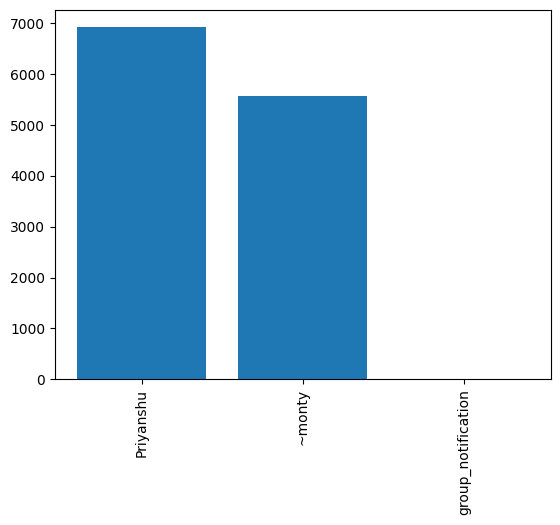

In [21]:
x=df['user'].value_counts().head()
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,Priyanshu,55.37
1,~monty,44.62
2,group_notification,0.01


In [26]:
temp=df[df['user']!='group_notification']
temp

,date,user,message,year,month,day,hour,minute
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29,17,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29,17,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29,18,37
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29,18,40
5,2024-12-29 20:56:00,Priyanshu,Bhai ye Madhav ki shi mai shaadi hogyi kya?\n,2024,December,29,20,56
...,...,...,...,...,...,...,...,...
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17,22,45
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17,22,45
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17,22,45
12486,2025-11-17 22:45:00,Priyanshu,<Media omitted>\n,2025,November,17,22,45


In [29]:
temp=temp[temp['message']!='<Media omitted>\n']
temp

,date,user,message,year,month,day,hour,minute
1,2024-12-29 17:29:00,Priyanshu,Nikal gye?\n,2024,December,29,17,29
2,2024-12-29 17:29:00,Priyanshu,Campus ke liye?\n,2024,December,29,17,29
3,2024-12-29 18:37:00,~monty,Mai Patna aa gya hu\n,2024,December,29,18,37
4,2024-12-29 18:40:00,Priyanshu,Mtlb?\n,2024,December,29,18,40
5,2024-12-29 20:56:00,Priyanshu,Bhai ye Madhav ki shi mai shaadi hogyi kya?\n,2024,December,29,20,56
...,...,...,...,...,...,...,...,...
12481,2025-11-17 22:45:00,Priyanshu,Koi kyu hi lega mujhe\n,2025,November,17,22,45
12483,2025-11-17 22:45:00,~monty,Sahi bat hai\n,2025,November,17,22,45
12484,2025-11-17 22:45:00,Priyanshu,Bas muhchodi aati haj\n,2025,November,17,22,45
12485,2025-11-17 22:45:00,Priyanshu,Wo bhi mood pe dependent hai\n,2025,November,17,22,45


In [30]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
+91
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could


In [37]:
words=[]

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
          words.append(word)
words


['nikal',
 'gye?',
 'campus',
 'liye?',
 'patna',
 'gya',
 'mtlb?',
 'madhav',
 'shi',
 'shaadi',
 'hogyi',
 'kya?',
 'bakchodi',
 'nani',
 'icu',
 'dekhne',
 'gya',
 'hospital',
 'join',
 'bhai?',
 'room',
 'leta',
 'badhiya',
 'party',
 'chalu',
 '😂',
 'krenge',
 'sayad',
 'achala',
 'ki?',
 'paas',
 'paise',
 'bhejde',
 'yaar',
 'khali',
 'hogya',
 'papa',
 'maang',
 'skta',
 '2-3',
 'chlega',
 '...gharwalo',
 'mang',
 'skta',
 '..nani',
 'death',
 'gya',
 'subah',
 '..mangne',
 'lgega',
 'aryaman',
 'mang',
 'deta',
 'chlega?',
 'sorry',
 'chill',
 'dena',
 'tk',
 'mummy',
 'mang',
 'leta',
 'chill',
 'sb',
 'fir?',
 'waapas',
 'kya?',
 '..mummy',
 'khayi',
 '..bs',
 'roye',
 '..usi',
 'tnsn',
 '13vi',
 'jaunga',
 'sayad',
 'yaar',
 'bhaiya',
 'udhar?',
 'hai?',
 '..thoda',
 'regret',
 'smjh',
 'skta',
 'nani',
 '1-2',
 'bar',
 'chuka',
 '..mujhe',
 'lga',
 'jaega',
 '..mai',
 'sb',
 'chhor',
 'patna',
 'chala',
 'gya',
 'galti',
 'overthink',
 'mt',
 'focused',
 'maksad',
 'aate',

In [38]:
from collections import Counter

In [39]:
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,yaar,656
1,gya,299
2,sb,227
3,arey,207
4,baat,164
5,message,164
6,<this,149
7,edited>,149
8,chill,143
9,tk,131


In [40]:
import emoji

In [42]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])

In [44]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,491
1,🤣,408
2,😭,281
3,😔,81
4,🥰,60
5,🥹,44
6,🤙,41
7,☹,34
8,🫠,24
9,🏽,10


In [45]:
df['month_num']=df['date'].dt.month

In [55]:
timeline=df.groupby(['year','month_num','month'])['message'].count().reset_index()

In [60]:
time=[]
for i in range (timeline.shape[0]):
   time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [61]:
time

['December-2024',
 'January-2025',
 'February-2025',
 'March-2025',
 'April-2025',
 'May-2025',
 'June-2025',
 'July-2025',
 'August-2025',
 'September-2025',
 'October-2025',
 'November-2025']

In [62]:
timeline['time']=time
timeline

,year,month_num,month,message,time
0,2024,12,December,214,December-2024
1,2025,1,January,112,January-2025
2,2025,2,February,37,February-2025
3,2025,3,March,164,March-2025
4,2025,4,April,289,April-2025
5,2025,5,May,1618,May-2025
6,2025,6,June,1940,June-2025
7,2025,7,July,1137,July-2025
8,2025,8,August,412,August-2025
9,2025,9,September,886,September-2025


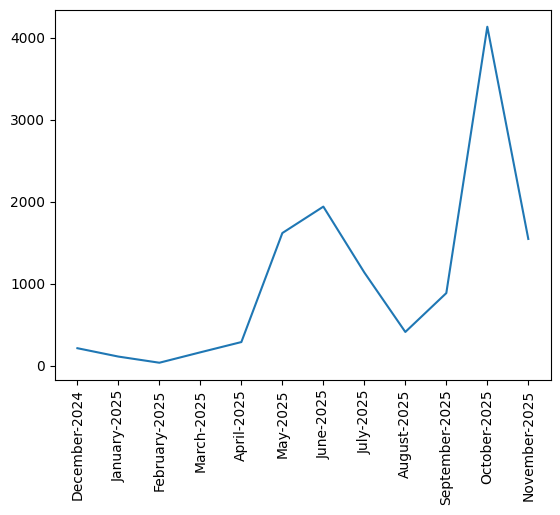

In [64]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
df['only_date']=df['date'].dt.date

In [67]:
daily_timeline=df.groupby('only_date')['message'].count().reset_index()

In [68]:
daily_timeline

,only_date,message
0,2024-12-29,6
1,2024-12-30,5
2,2024-12-31,203
3,2025-01-01,7
4,2025-01-03,7
...,...,...
158,2025-11-09,101
159,2025-11-10,359
160,2025-11-12,161
161,2025-11-15,37


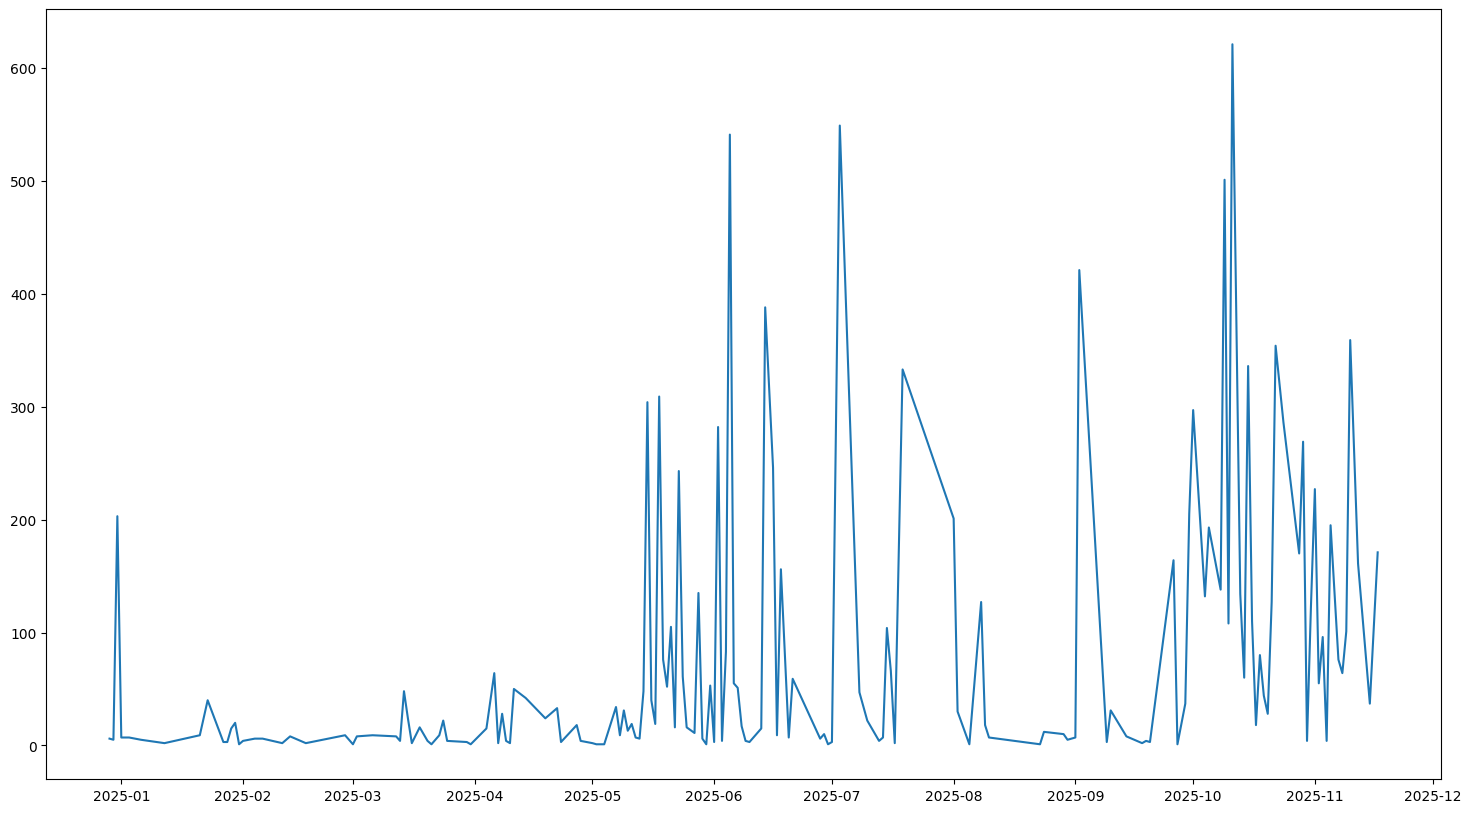

In [69]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [70]:
df['day_name']=df['date'].dt.day_name()

In [71]:
df['day_name'].value_counts()

day_name
Wednesday    2445
Saturday     2255
Thursday     2170
Friday       1632
Monday       1541
Tuesday      1534
Sunday        911
Name: count, dtype: int64

In [74]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour) + "-" +str('00'))
    elif hour==0:
        period.append(str('00') + "-" +str(hour+1))
    else:
        period.append(str(hour) + "-"+str(hour+1))
        

In [76]:
df['period']=period
df['period']

0        17-18
1        17-18
2        17-18
3        18-19
4        18-19
         ...  
12483    22-23
12484    22-23
12485    22-23
12486    22-23
12487    22-23
Name: period, Length: 12488, dtype: object